# 赛题数据及理解
赛题以街道字符为为赛题数据，数据集报名后可见并可下载，该数据来自收集的SVHN街道字符，并进行了匿名采样处理。  



![数据示例](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/%E8%B5%9B%E4%BA%8B%E7%AE%80%E4%BB%8B/%E6%95%B0%E6%8D%AE%E9%9B%86%E6%A0%B7%E6%9C%AC%E5%B1%95%E7%A4%BA.png)
             
注意: 按照比赛规则，所有的参赛选手只能使用比赛给定的数据集完成训练，不能使用SVHN原始数据集进行训练。比赛结束后将会对Top选手进行代码审核，违规的选手将清除排行榜成绩。
         
训练集数据包括3W张照片，验证集数据包括1W张照片，每张照片包括颜色图像和对应的编码类别和具体位置；为了保证比赛的公平性，测试集A包括4W张照片，测试集B包括4W张照片。
       
需要注意的是本赛题需要选手识别图片中所有的字符，为了降低比赛难度，我们提供了训练集、验证集中所有字符的位置框。


    
## 数据标签      
对于训练数据每张图片将给出对于的编码标签，和具体的字符框的位置（训练集、验证集都给出字符位置），可用于模型训练：

 Field  | Description|
--------- | --------|
top	| 左上角坐标X |
height	| 字符高度 |
left   | 左上角最表Y |
width  | 字符宽度 |
label  | 字符编码 |
      
字符的坐标具体如下所示：     
![坐标](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/%E5%AD%97%E7%AC%A6%E5%9D%90%E6%A0%87.png)     
     
 在比赛数据（训练集和验证集）中，同一张图片中可能包括一个或者多个字符，因此在比赛数据的JSON标注中，会有两个字符的边框信息： 

 |原始图片|图片JSON标注|
 |----|-----|
 |![19](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/%E5%8E%9F%E5%A7%8B%E5%9B%BE%E7%89%87.png)    | ![标注](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/%E5%8E%9F%E5%A7%8B%E5%9B%BE%E7%89%87%E6%A0%87%E6%B3%A8.png)  |
 

## 评测指标     
 选手提交结果与实际图片的编码进行对比，以编码整体识别准确率为评价指标。任何一个字符错误都为错误，最终评测指标结果越大越好，具体计算公式如下：     
                                              Score=编码识别正确的数量/测试集图片数量      

## 解题思路
赛题思路分析：赛题本质是分类问题，需要对图片的字符进行识别。但赛题给定的数据图片中不同图片中包含的字符数量不等，如下图所示。有的图片的字符个数为2，有的图片字符个数为3，有的图片字符个数为4。      
       
  |字符属性|图片|
 |----|-----|
 |字符：42   字符个数：2    | ![标注](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/42.png)  |
 |字符：241   字符个数：3    | ![标注](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/2411.png)  |
 |字符：7358   字符个数：4    | ![标注](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/7358.png)  |
  
因此本次赛题的难点是需要对不定长的字符进行识别，与传统的图像分类任务有所不同。为了降低参赛难度，我们提供了一些解题思路供大家参考：     
      
- 简单入门思路：定长字符识别    
     
可以将赛题抽象为一个定长字符识别问题，在赛题数据集中大部分图像中字符个数为2-4个，最多的字符    个数为6个。                 
因此可以对于所有的图像都抽象为6个字符的识别问题，字符23填充为23XXXX，字符231填充为231XXX。      
![标注](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/23xxxxxx.png)   

经过填充之后，原始的赛题可以简化了6个字符的分类问题。在每个字符的分类中会进行11个类别的分类，假如分类为填充字符，则表明该字符为空。         
- 专业字符识别思路：不定长字符识别 
        
![标注](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/%E4%B8%8D%E5%AE%9A%E9%95%BF%E5%AD%97%E7%AC%A6%E8%AF%86%E5%88%AB.png)      
            
在字符识别研究中，有特定的方法来解决此种不定长的字符识别问题，比较典型的有CRNN字符识别模型。     
在本次赛题中给定的图像数据都比较规整，可以视为一个单词或者一个句子。   

- 专业分类思路：检测再识别     
      
在赛题数据中已经给出了训练集、验证集中所有图片中字符的位置，因此可以首先将字符的位置进行识别，利用物体检测的思路完成。        
      
![IMG](https://github.com/datawhalechina/team-learning-cv/raw/master/CharacterCodingRecognition/IMG/Task01/%E6%A3%80%E6%B5%8B.png)           
            
此种思路需要参赛选手构建字符检测模型，对测试集中的字符进行识别。选手可以参考物体检测模型SSD或者YOLO来完成。

## 小结
综上所示，本次赛题虽然是一个简单的字符识别问题，但有多种解法可以使用到计算机视觉领域中的各个模型，是非常适合大家入门学习的。
三种解决思路的难度从低到高，因此建议入门学习的同学可以先学习定长字符识别的思路。在文档之后的内容中我们也会以定长字符识别为例，让大家逐渐入门计算机视觉。

# 下载数据集
根据提供csv中的链接，分别下载各个数据集，并且放在dataset文件夹中

In [ ]:
import pandas as pd
path = 'mchar_data_list_0515.csv'
download = pd.read_csv(path)
download

In [ ]:
for link in download['link']:
        cmd = '!wget %s'%link
        print(cmd)

In [ ]:
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_train.zip
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_train.json
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_val.zip
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_val.json
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_test_a.zip
!wget http://tianchi-competition.oss-cn-hangzhou.aliyuncs.com/531795/mchar_sample_submit_A.csv
!unzip -q mchar_train.zip
!unzip -q mchar_val.zip
!unzip -q mchar_test_a.zip

In [ ]:
pip install tqdm pandas matplotlib opencv-python

## JSON 数据读取方式

In [ ]:
import matplotlib.pyplot as plt
import json,cv2
import numpy as np

train_json = json.load(open('./mchar_train.json'))

# 数据标注处理
def parse_json(d):
   arr = np.array([
       d['top'], d['height'], d['left'],  d['width'], d['label']
   ])
   arr = arr.astype(int)
   return arr

img = cv2.imread('./mchar_train/000000.png')
arr = parse_json(train_json['000000.png'])
print(arr)

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):
   plt.subplot(1, arr.shape[1]+1, idx+2)
   plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
   plt.title(arr[4, idx])
   plt.xticks([]); plt.yticks([])

# 数据读取

## 首先导入必要的库

In [1]:
import os, sys, glob, shutil, json
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
import cv2

from PIL import Image
import numpy as np

from tqdm import tqdm, tqdm_notebook

%pylab inline

import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = False
    torch.backends.cudnn.benchmark = True # #for accelerating the running
setup_seed(0)


## 定义读取数据集

In [3]:
class SVHNDataset(Dataset):
    def __init__(self, img_path, img_label, transform=None):
        self.img_path = img_path
        self.img_label = img_label 
        if transform is not None:
            self.transform = transform
        else:
            self.transform = None

    def __getitem__(self, index):
        img = Image.open(self.img_path[index]).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)
        
        lbl = np.array(self.img_label[index], dtype=np.int)
        lbl = list(lbl)  + (5 - len(lbl)) * [10]
        return img, torch.from_numpy(np.array(lbl[:5]))

    def __len__(self):
        return len(self.img_path)

## 定义读取数据dataloader

假设数据存放在`./dataset`文件夹下，并进行解压。

In [4]:
train_path = glob.glob(r'E:/数据挖掘之天池比赛/零基础入门CV-街景字符编码识别/dataset/mchar_train/*.png')
train_path.sort()
train_json = json.load(open('E:/数据挖掘之天池比赛/零基础入门CV-街景字符编码识别/dataset/mchar_train.json'))
train_label = [train_json[x]['label'] for x in train_json]
print(len(train_path), len(train_label))

train_loader = torch.utils.data.DataLoader(
    SVHNDataset(train_path, train_label,
                transforms.Compose([
                    transforms.Resize((64, 128)),
                    transforms.RandomCrop((60, 120)),
                    transforms.ColorJitter(0.3, 0.3, 0.2),
                    transforms.RandomRotation(10),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])), 
    batch_size=40, 
    shuffle=True, 
    num_workers=0,
)

val_path = glob.glob('E:/数据挖掘之天池比赛/零基础入门CV-街景字符编码识别/dataset/mchar_val/*.png')
val_path.sort()
val_json = json.load(open('E:/数据挖掘之天池比赛/零基础入门CV-街景字符编码识别/dataset/mchar_val.json'))
val_label = [val_json[x]['label'] for x in val_json]
print(len(val_path), len(val_label))

val_loader = torch.utils.data.DataLoader(
    SVHNDataset(val_path, val_label,
                transforms.Compose([
                    transforms.Resize((60, 120)),
                    # transforms.ColorJitter(0.3, 0.3, 0.2),
                    # transforms.RandomRotation(5),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])), 
    batch_size=40, 
    shuffle=False, 
    num_workers=0,
)

30000 30000
10000 10000


# 可视化数据

In [5]:
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]

In [6]:
def imshow(img):
    for i in range(3):
      img[i,:,:] = img[i,:,:] * stds[i] + means[i]
    img = np.transpose(img.numpy(),(1,2,0))
    plt.imshow(img)

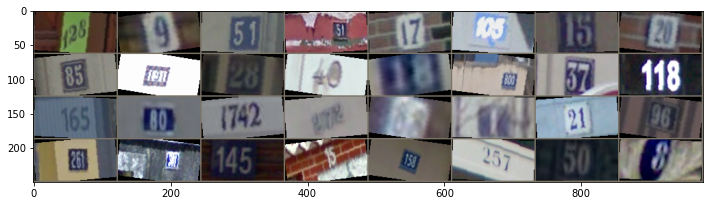

In [7]:
import torchvision
im,label = next(iter(train_loader))
plt.figure(figsize=(12,16))
imshow(torchvision.utils.make_grid(im[:32]))

# 定义分类模型

这里使用ResNet18的模型进行特征提取

In [8]:
class SVHN_Model1(nn.Module):
    def __init__(self):
        super(SVHN_Model1, self).__init__()
                
        model_conv = models.resnet18(pretrained=True)
        model_conv.avgpool = nn.AdaptiveAvgPool2d(1)
        model_conv = nn.Sequential(*list(model_conv.children())[:-1])
        self.cnn = model_conv
        
        self.fc1 = nn.Linear(512, 11)
        self.fc2 = nn.Linear(512, 11)
        self.fc3 = nn.Linear(512, 11)
        self.fc4 = nn.Linear(512, 11)
        self.fc5 = nn.Linear(512, 11)
    
    def forward(self, img):        
        feat = self.cnn(img)
        # print(feat.shape)
        feat = feat.view(feat.shape[0], -1)
        c1 = self.fc1(feat)
        c2 = self.fc2(feat)
        c3 = self.fc3(feat)
        c4 = self.fc4(feat)
        c5 = self.fc5(feat)
        return c1, c2, c3, c4, c5

# 定义训练函数

In [9]:
def train(train_loader, model, criterion, optimizer, epoch):
    # 切换模型为训练模式
    model.train()
    train_loss = []
    print('Start Train')
    with tqdm(total=len(train_loader),desc=f'Epoch {epoch + 1}/{epochs}',postfix=dict,mininterval=0.3,ncols=100) as pbar:    
        for i, (input, target) in enumerate(train_loader):
            if use_cuda:
                input = input.cuda()
                target = target.cuda()
            target = target.to(torch.long)
            c0, c1, c2, c3, c4 = model(input)
            loss = criterion(c0, target[:, 0]) + \
                    criterion(c1, target[:, 1]) + \
                    criterion(c2, target[:, 2]) + \
                    criterion(c3, target[:, 3]) + \
                    criterion(c4, target[:, 4])
            
            # loss /= 6
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())
            pbar.set_postfix(**{'Train Loss' : loss.item()})
            pbar.update(1)
    print('Finish Train')
    return np.mean(train_loss)



# 定义预测函数

In [10]:
def validate(val_loader, model, criterion):
    # 切换模型为预测模型
    model.eval()
    val_loss = []
    print('Start Validation')
    with tqdm(total=len(val_loader),desc=f'Epoch {epoch + 1}/{epochs}',postfix=dict,mininterval=0.3,ncols=100) as pbar:    
    # 不记录模型梯度信息
        with torch.no_grad():
            for i, (input, target) in enumerate(val_loader):
                if use_cuda:
                    input = input.cuda()
                    target = target.cuda()
                target = target.to(torch.long)
                c0, c1, c2, c3, c4 = model(input)
                loss = criterion(c0, target[:, 0]) + \
                        criterion(c1, target[:, 1]) + \
                        criterion(c2, target[:, 2]) + \
                        criterion(c3, target[:, 3]) + \
                        criterion(c4, target[:, 4])
                # loss /= 6
                pbar.set_postfix(**{'Val Loss' : loss.item()})
                pbar.update(1)
                val_loss.append(loss.item())
    print('Finish Validation')
    return np.mean(val_loss)

def predict(test_loader, model, tta=10):
    model.eval()
    test_pred_tta = None
    
    # TTA 次数
    for _ in range(tta):
        test_pred = []
    
        with torch.no_grad():
            for i, (input, target) in enumerate(test_loader):
                if use_cuda:
                    input = input.cuda()
                
                c0, c1, c2, c3, c4 = model(input)
                if use_cuda:
                    output = np.concatenate([
                        c0.data.cpu().numpy(), 
                        c1.data.cpu().numpy(),
                        c2.data.cpu().numpy(), 
                        c3.data.cpu().numpy(),
                        c4.data.cpu().numpy()], axis=1)
                else:
                    output = np.concatenate([
                        c0.data.numpy(), 
                        c1.data.numpy(),
                        c2.data.numpy(), 
                        c3.data.numpy(),
                        c4.data.numpy()], axis=1)
                
                test_pred.append(output)
        
        test_pred = np.vstack(test_pred)
        if test_pred_tta is None:
            test_pred_tta = test_pred
        else:
            test_pred_tta += test_pred
    
    return test_pred_tta

# 训练与验证

In [11]:
model = SVHN_Model1()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.001)
best_loss = 1000.0

use_cuda = True
if use_cuda:
    model = model.cuda()
epochs = 10
for epoch in range(epochs):
    train_loss = train(train_loader, model, criterion, optimizer, epoch)
    val_loss = validate(val_loader, model, criterion)
    
    val_label = [''.join(map(str, x)) for x in val_loader.dataset.img_label]
    val_predict_label = predict(val_loader, model, 1)
    val_predict_label = np.vstack([
        val_predict_label[:, :11].argmax(1),
        val_predict_label[:, 11:22].argmax(1),
        val_predict_label[:, 22:33].argmax(1),
        val_predict_label[:, 33:44].argmax(1),
        val_predict_label[:, 44:55].argmax(1),
    ]).T
    val_label_pred = []
    for x in val_predict_label:
        val_label_pred.append(''.join(map(str, x[x!=10])))
    
    val_char_acc = np.mean(np.array(val_label_pred) == np.array(val_label))
    
    print('Epoch: {0}, Train loss: {1} \t Val loss: {2}'.format(epoch+1, train_loss, val_loss))
    print('Val Acc', val_char_acc)
    # 记录下验证集精度
    if val_loss < best_loss:
        best_loss = val_loss
        # print('Find better model in Epoch {0}, saving model.'.format(epoch))
        torch.save(model.state_dict(), './model.pt')

Start Train


Epoch 1/10: 100%|████████████████████████████████| 750/750 [17:29<00:00,  1.40s/it, Train Loss=2.63]


Finish Train
Start Validation


Epoch 1/10:  69%|███████████████████████▍          | 172/250 [04:29<02:05,  1.61s/it, Val Loss=4.03]

# 预测并生成提交文件

In [ ]:
test_path = glob.glob('E:/数据挖掘之天池比赛/零基础入门CV-街景字符编码识别/dataset/mchar_test_a/*.png')
test_path.sort()
# test_json = json.load(open('E:/数据挖掘之天池比赛/零基础入门CV-街景字符编码识别/dataset/mchar_test_a.json'))
test_label = [[1]] * len(test_path)
print(len(test_path), len(test_label))

test_loader = torch.utils.data.DataLoader(
    SVHNDataset(test_path, test_label,
                transforms.Compose([
                    transforms.Resize((60, 120)),   # TODO: modify here
                    # transforms.RandomCrop((60, 120)),
                    # transforms.ColorJitter(0.3, 0.3, 0.2),
                    # transforms.RandomRotation(5),
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])), 
    batch_size=40, 
    shuffle=False, 
    num_workers=0,
)

In [ ]:
# 加载保存的最优模型
model.load_state_dict(torch.load('model.pt'))

test_predict_label = predict(test_loader, model, 1)
print(test_predict_label.shape)

test_label = [''.join(map(str, x)) for x in test_loader.dataset.img_label]
test_predict_label = np.vstack([
    test_predict_label[:, :11].argmax(1),
    test_predict_label[:, 11:22].argmax(1),
    test_predict_label[:, 22:33].argmax(1),
    test_predict_label[:, 33:44].argmax(1),
    test_predict_label[:, 44:55].argmax(1),
]).T

test_label_pred = []
for x in test_predict_label:
    test_label_pred.append(''.join(map(str, x[x!=10])))
    
import pandas as pd
df_submit = pd.read_csv('E:/数据挖掘之天池比赛/零基础入门CV-街景字符编码识别/dataset/mchar_test_A_sample_submit.csv')
df_submit['file_code'] = test_label_pred
df_submit.to_csv('submit.csv', index=None)